# Emotion Classification Project

In [ ]:
# import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Load the dataset
df=pd.read_csv("Emotion_classify_Data.csv")
print(df.head(5))
print(df.shape)

                                             Comment Emotion
0  i seriously hate one subject to death but now ...    fear
1                 im so full of life i feel appalled   anger
2  i sit here to write i start to dig out my feel...    fear
3  ive been really angry with r and i feel like a...     joy
4  i feel suspicious if there is no one outside l...    fear
(5937, 2)


In [2]:
df.columns

Index(['Comment', 'Emotion'], dtype='object')

In [3]:
print(df.Emotion.value_counts())

Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64


In [ ]:
#creating new column with numerical values for emotions
df["Emotion_num"]=df["Emotion"].map({
    'joy': 0, 'fear' : 1, 'anger': 2
})
print(df.head(5))

                                             Comment Emotion  Emotion_num
0  i seriously hate one subject to death but now ...    fear            1
1                 im so full of life i feel appalled   anger            2
2  i sit here to write i start to dig out my feel...    fear            1
3  ive been really angry with r and i feel like a...     joy            0
4  i feel suspicious if there is no one outside l...    fear            1


In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Comment'], df['Emotion_num'], 
    test_size=0.2, 
    random_state=2022, 
    stratify=df['Emotion_num']
)

In [6]:
print(X_train.shape,X_test.shape)

(4749,) (1188,)


### Creating pipelines with CountVectorizer and ML models

In [ ]:
# Create a pipeline with CountVectorizer and RandomForestClassifier
pipeline = Pipeline([
    ('vect', CountVectorizer(ngram_range=(3, 3))),
    ('clf', RandomForestClassifier(random_state=2022))
])


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.57      0.27      0.37       400
           1       0.37      0.79      0.50       388
           2       0.52      0.21      0.30       400

    accuracy                           0.42      1188
   macro avg       0.49      0.42      0.39      1188
weighted avg       0.49      0.42      0.39      1188



In [10]:
# Create a pipeline with CountVectorizer and MultinomialNB
pipeline_nb = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 2))),
    ('clf', MultinomialNB())
])

pipeline_nb.fit(X_train, y_train)

y_pred = pipeline_nb.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.86      0.87       400
           1       0.87      0.83      0.85       388
           2       0.83      0.88      0.85       400

    accuracy                           0.86      1188
   macro avg       0.86      0.86      0.86      1188
weighted avg       0.86      0.86      0.86      1188



In [11]:
# Create a pipeline with CountVectorizer(bigram) and RandomForestClassifier
pipeline_rf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 2))),
    ('clf', RandomForestClassifier(random_state=2022))
])
pipeline_rf.fit(X_train, y_train)

y_pred = pipeline_rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       400
           1       0.95      0.87      0.91       388
           2       0.93      0.87      0.90       400

    accuracy                           0.90      1188
   macro avg       0.91      0.90      0.90      1188
weighted avg       0.91      0.90      0.90      1188



### Creating pipelines with tf-idf and Ml models


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a pipeline with TfidfVectorizer and RandomForestClassifier
pipeline_tfidf_rf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', RandomForestClassifier(random_state=2022))
])

pipeline_tfidf_rf.fit(X_train, y_train)

y_pred = pipeline_tfidf_rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       400
           1       0.92      0.90      0.91       388
           2       0.95      0.86      0.90       400

    accuracy                           0.91      1188
   macro avg       0.91      0.91      0.91      1188
weighted avg       0.91      0.91      0.91      1188



### Using spacy to remove stop words and punctuation

In [13]:
import spacy
# Load the English NLP model
nlp = spacy.load("en_core_web_sm") 
# Function to preprocess text using spaCy
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens) 

In [14]:
# Apply preprocessing to the 'Comment' column
df["preprocessed_comment"]=df["Comment"].apply(preprocess)

In [15]:
df["preprocessed_comment"]

0        seriously hate subject death feel reluctant drop
1                                    m life feel appalled
2       sit write start dig feeling think afraid accep...
3                  ve angry r feel like idiot trust place
4             feel suspicious outside like rapture happen
                              ...                        
5932                                begin feel distressed
5933    leave feel annoyed angry thinking center stupi...
5934    marry d ready offer ve get club perfect good l...
5935    feel reluctant apply want able find company kn...
5936             want apologize feel like heartless bitch
Name: preprocessed_comment, Length: 5937, dtype: object

In [16]:
X_train_prep, X_test_prep, y_train_prep, y_test_prep = train_test_split(
    df['preprocessed_comment'], df['Emotion_num'],
    test_size=0.2,
    random_state=2022,
    stratify=df['Emotion_num']
)


In [17]:
# Create a pipeline with CountVectorizer(bigram) and RandomForestClassifier after preprocessing
pipeline_rf_prep = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 2))),
    ('clf', RandomForestClassifier(random_state=2022))
])

pipeline_rf_prep.fit(X_train_prep, y_train_prep)
y_pred=pipeline_rf_prep.predict(X_test)

print(classification_report(y_test_prep, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       400
           1       0.95      0.81      0.87       388
           2       0.90      0.85      0.87       400

    accuracy                           0.87      1188
   macro avg       0.88      0.87      0.87      1188
weighted avg       0.88      0.87      0.87      1188



In [18]:
# Create a pipeline with TfidfVectorizer and RandomForestClassifier after preprocessing
pipeline_tfidf_rf_prep = Pipeline([
    ('vect', TfidfVectorizer(ngram_range=(1, 2))),
    ('clf', RandomForestClassifier(random_state=2022))
])

pipeline_tfidf_rf_prep.fit(X_train_prep, y_train_prep)
y_pred = pipeline_tfidf_rf_prep.predict(X_test_prep)

print(classification_report(y_test_prep, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       400
           1       0.93      0.92      0.93       388
           2       0.93      0.92      0.93       400

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188



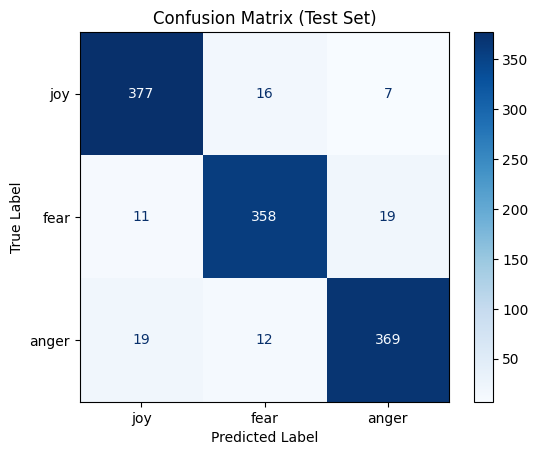

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test_prep, y_pred, labels=[0, 1, 2])


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['joy', 'fear', 'anger'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### Creating a function to predict the emotion of the given sentence 

In [ ]:
def predict_emotion(sentence):
    # Use the best model: pipeline_tfidf_rf_prep (TF-IDF + RandomForest on preprocessed text)
    preprocessed = preprocess(sentence)
    pred_num = pipeline_tfidf_rf_prep.predict([preprocessed])[0]
    # Map numerical prediction back to emotion label
    emotion_map = {0: 'joy', 1: 'fear', 2: 'anger'}
    return emotion_map.get(pred_num, "Unknown")

test_sentence = "I can't stop smiling—getting that promotion feels like all my hard work finally paid off!"
predicted_emotion = predict_emotion(test_sentence)
print(f"Predicted emotion: {predicted_emotion}")

Predicted emotion: joy


In [22]:
test_sentence2 = "My hands are trembling as I stare at the test results, too terrified to read what they might say."
predicted_emotion2 = predict_emotion(test_sentence2)
print(f"Predicted emotion: {predicted_emotion2}")


Predicted emotion: fear


In [21]:
test_sentence3 = "I'm absolutely furious that they lied to my face after I trusted them completely."
predicted_emotion3 = predict_emotion(test_sentence3)
print(f"Predicted emotion: {predicted_emotion3}")

Predicted emotion: anger
